In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import math
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from utils.utils import DataHandling, FeatureRecipe, FeatureExtractor

In [2]:
dh = DataHandling()

DataHandling intialization
Intialization done !


In [3]:
dh.get_data()

Loading data from local file...
Dataset shape : 11914 lines, 16 columns
Data loaded from local file !


In [4]:
ftr = FeatureRecipe(dh.data)
ftr.prepare_data(0.3)

FeatureRecipe intialization...
Initialization done !
Dropping useless features and observations...
Useless features and observations dropped !

Dropping features with more than 30.0 % NaN...
Dropped 0 features.

Separating features by type...
Dataset columns : 15 
Number of discrete features : 5 
Number of continuous features : 3 
Number of categorical features : 7 
Total number of features : 15

Processed dataset shape : 8206 lines, 16 columns
FeatureRecipe processing done !



### Séparation du dataset
Le dataset est divisé en 2, un dataset d'entrainement et un dataset de test. La majorité des observation sera utilisée pour l'entrainement, et la petite partie restante sera utilisée pour le test. 

In [5]:
df=ftr.data
x = df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y = df['Price'].values

print(x.shape)
print(y.shape)

(8206, 6)
(8206,)


In [6]:
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5744, 6)
(5744, 1)
(2462, 6)
(2462, 1)


In [35]:
rfc_model=RandomForestRegressor(n_estimators=50,random_state=42)
rfc_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",rfc_model.score(x_train,y_train))
print("Testing Accuracy :",rfc_model.score(x_test,y_test))


<ipython-input-35-ab9f5539f83c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(x_train,y_train)


Training Accuracy : 0.9693945659875487
Testing Accuracy : 0.9351273076844421


In [19]:
y_pred = rfc_model.predict(x_test)
y_pred[0:5]

array([-1.36012274, -1.55026872,  1.33524196, -0.28218401, -0.97066431])

Text(0, 0.5, 'Predicted Values')

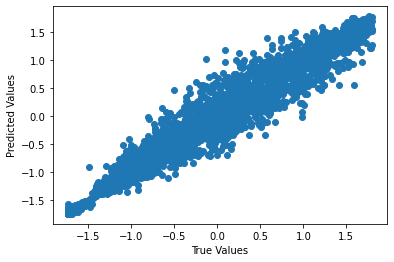

In [10]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [ ]:
# TROP LONG A FAIRE TOURNER
# sns.displot((y_test-y_pred))

In [15]:
print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Root Mean Square Error : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.9350088770400108
Mean Squared Error :  0.06607232405879213
Mean Absolute Error :  0.18919018453993894
Root Mean Square Error :  0.257045373540922
